In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import warnings
warnings.filterwarnings('ignore')

In [51]:
# !rm -rf plots

In [52]:
# ========== CREATE PLOT FOLDER ==========
plot_folder = "plots"
os.makedirs(plot_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Function to save and show plots
def save_and_show_plot(plot_name):
    file_path = os.path.join(plot_folder, f"{plot_name}.png")
    plt.savefig(file_path, bbox_inches='tight')  # Save the plot
    plt.show()  # Display the plot
    plt.close()  # Close the plot to free memory

# ========== VISUALIZATION SETUP ==========
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

In [53]:
def zip_folder(folder_path, output_path):
  """Zips a folder to a specified output path."""
  try:
    shutil.make_archive(output_path, 'zip', folder_path)
    print(f"Folder '{folder_path}' successfully zipped to '{output_path}.zip'")
  except Exception as e:
    print(f"Error zipping folder: {e}")

In [54]:
data = pd.read_csv("/content/P  L March 2021.csv")
df = data.copy()

In [55]:
df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP\n,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [56]:
df['Product_SKU'].nunique()

1330

In [57]:
df['Product_Size'] = df['Product_SKU'].str.split('_').str[-1]

size_counts = df['Product_Size'].value_counts()
sizes_to_replace = size_counts[size_counts == 1].index
df.loc[df['Product_Size'].isin(sizes_to_replace), 'Product_Size'] = 'Unknown'
df['Product_Size'].value_counts()

,count
Product_Size,
L,226
XL,222
M,219
S,212
2XL,212
3XL,205
XS,19
Unknown,15


In [58]:
# pd.Series(df["Product_Style_ID"]).apply(lambda x: x[2:])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1330 non-null   object
 4   Product_Category        1330 non-null   object
 5   Product_Weight          1330 non-null   object
 6   Transfer_Price_Level_1  1330 non-null   object
 7   Transfer_Price_Level_2  1330 non-null   object
 8   Old_MRP                 1330 non-null   object
 9   Final_Old_MRP           1330 non-null   object
 10  Ajio_MRP                1330 non-null   object
 11  Amazon_MRP              1330 non-null   object
 12  Amazon_FBA_MRP          1330 non-null   object
 13  Flipkart_MRP            1330 non-null   object
 14  Limeroad_MRP            1330 non-null   object
 15  Mynt

In [60]:
df.rename(columns={"Paytm_MRP\n": "Paytm_MRP"}, inplace=True)

In [61]:
duplicate_rows = df.duplicated().sum()
duplicate_rows.item()

0

In [62]:
# no missing values on the surface
# but certain values in the price columns with values "Nill"
# and excel reference errors "#VALUE!"
df.isnull().sum()

,0
index,0
Product_SKU,0
Product_Style_ID,0
Product_Catalog,0
Product_Category,0
Product_Weight,0
Transfer_Price_Level_1,0
Transfer_Price_Level_2,0
Old_MRP,0
Final_Old_MRP,0


In [63]:
df["Final_Old_MRP"] = df["Final_Old_MRP"].replace("Nill", pd.NA)
df.dropna(subset=["Final_Old_MRP"], inplace=True)

df = df.reset_index(drop=True)

In [64]:
len(df[df['Ajio_MRP'] == "Nill"])

0

In [65]:
len(df) == 1330 - 37

True

In [66]:
# df.eq("Nill").sum()

df['Product_Catalog'] = df['Product_Catalog'].replace('Nill', "Unknown")
df['Product_Category'] = df['Product_Category'].replace('Nill', "Unknown")
df['Product_Weight'] = df['Product_Weight'].replace('Nill', 0)

In [67]:
df['Product_Weight'].value_counts(dropna=False)

,count
Product_Weight,
0.3,802
0.4,374
0,72
0.2,45


In [68]:
len(df)

1293

In [69]:
# converting to their respective dtypes
df = df.astype({
    "Product_Category": "str",
    "Product_SKU": "str",
    "Product_Catalog": "str",
    "Product_Style_ID": "str",
    "Product_Weight": "float32",
    "Transfer_Price_Level_1": "float32",
    "Transfer_Price_Level_2": "float32",
    "Old_MRP": "float32",
    "Final_Old_MRP": "float32",
    "Ajio_MRP": "float32",
    "Amazon_MRP": "float32",
    "Amazon_FBA_MRP": "float32",
    "Flipkart_MRP": "float32",
    "Limeroad_MRP": "float32",
    "Myntra_MRP": "float32",
    "Paytm_MRP": "float32",
    "Snapdeal_MRP": "float32"
})

print(df.dtypes)

index                       int64
Product_SKU                object
Product_Style_ID           object
Product_Catalog            object
Product_Category           object
Product_Weight            float32
Transfer_Price_Level_1    float32
Transfer_Price_Level_2    float32
Old_MRP                   float32
Final_Old_MRP             float32
Ajio_MRP                  float32
Amazon_MRP                float32
Amazon_FBA_MRP            float32
Flipkart_MRP              float32
Limeroad_MRP              float32
Myntra_MRP                float32
Paytm_MRP                 float32
Snapdeal_MRP              float32
Product_Size               object
dtype: object


In [70]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Product_SKU")
cat_cols.remove("Product_Style_ID")
cat_cols

['Product_Catalog', 'Product_Category', 'Product_Size']

In [71]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove("index")
numerical_cols

['Product_Weight',
 'Transfer_Price_Level_1',
 'Transfer_Price_Level_2',
 'Old_MRP',
 'Final_Old_MRP',
 'Ajio_MRP',
 'Amazon_MRP',
 'Amazon_FBA_MRP',
 'Flipkart_MRP',
 'Limeroad_MRP',
 'Myntra_MRP',
 'Paytm_MRP',
 'Snapdeal_MRP']

In [72]:
# # Check if any column in numerical_cols contains a value of 0 or less
# has_zero_or_less = (df[numerical_cols] <= 0).any().any()

# if has_zero_or_less:
#   print("At least one numerical column contains a value of 0 or less.")
# else:
#   print("No numerical column contains a value of 0 or less.")

In [73]:
# marketplace_cols = ['Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
#                     'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

# for col in marketplace_cols:
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#     sns.histplot(df[col], ax=axes[0], kde=True)
#     axes[0].set_title(f'Distribution of {col}')

#     plt.tight_layout()
#     save_and_show_plot(f"{col}_distribution")

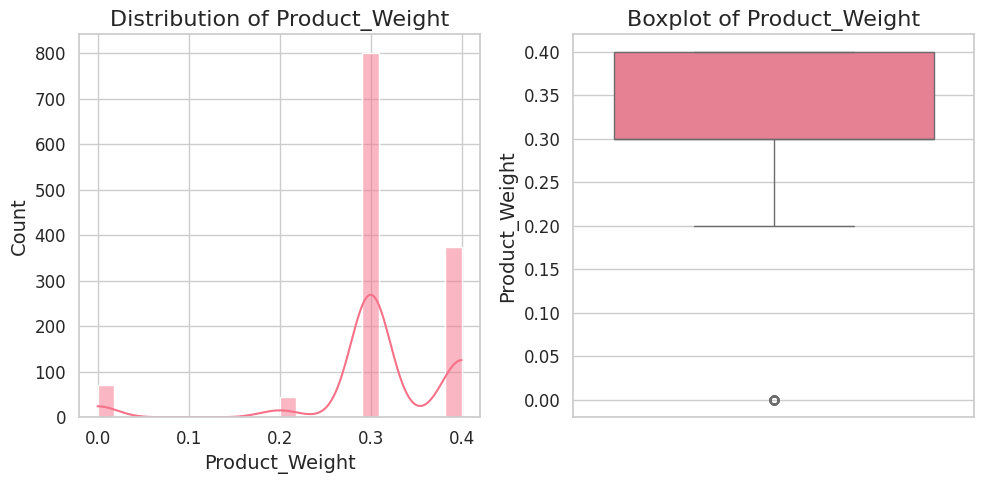

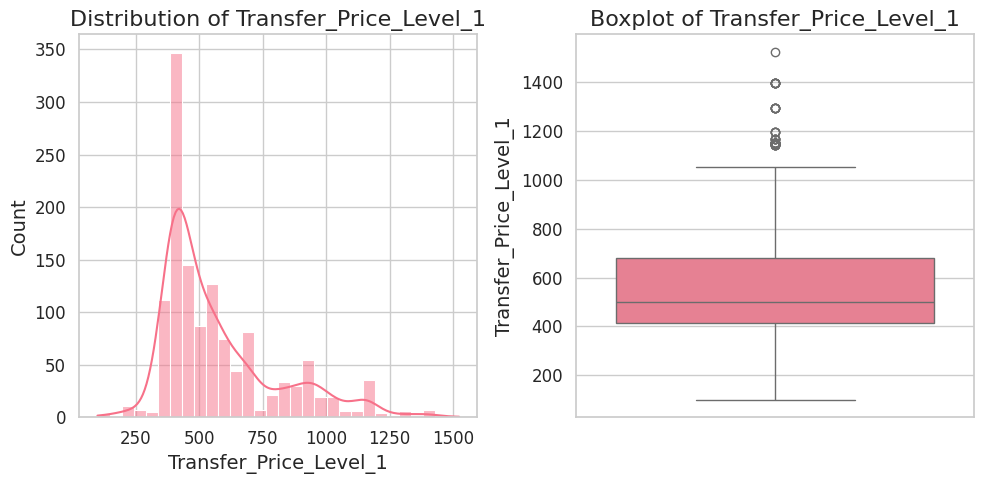

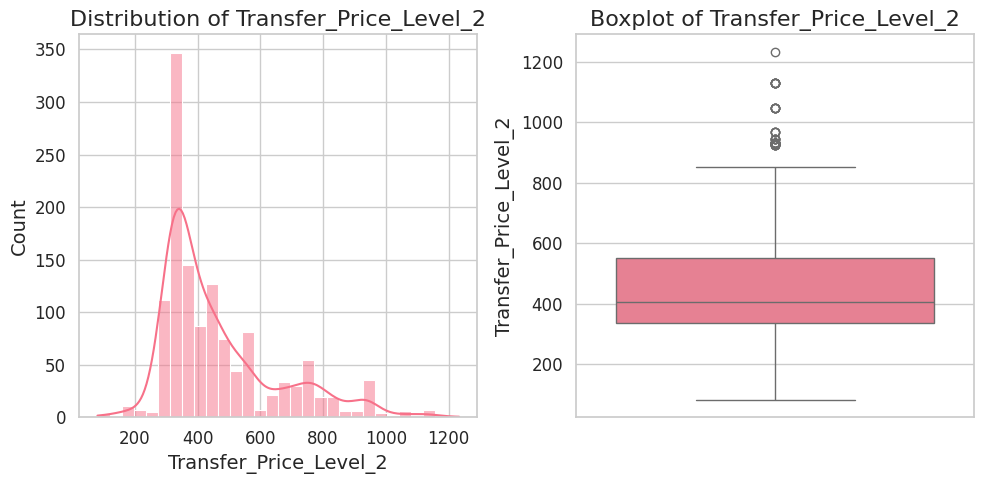

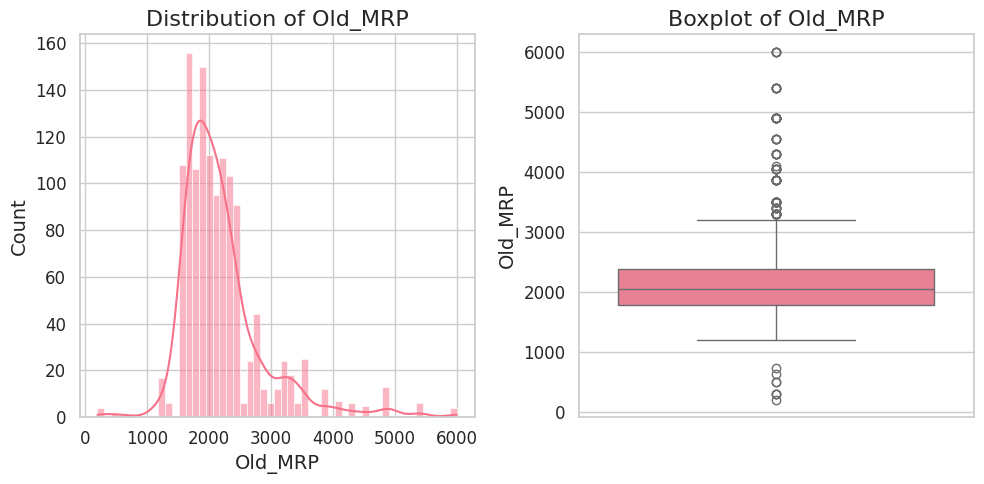

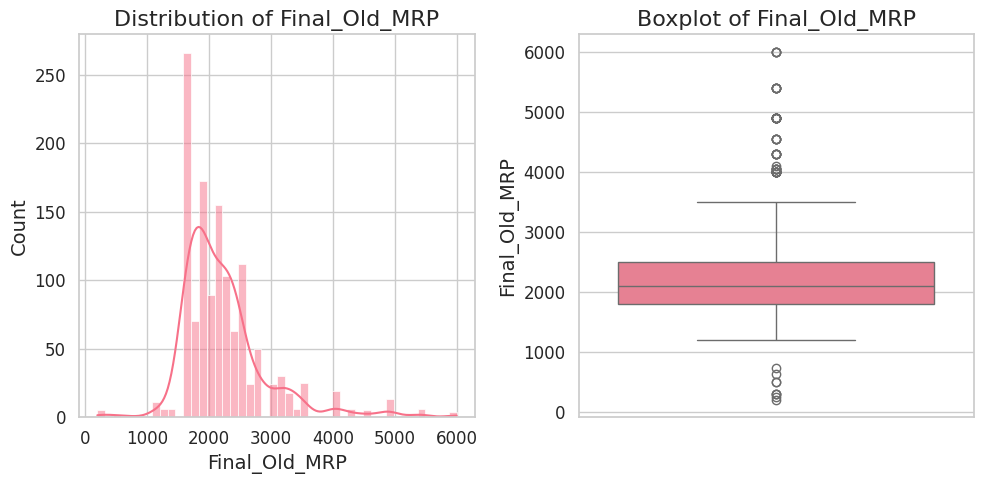

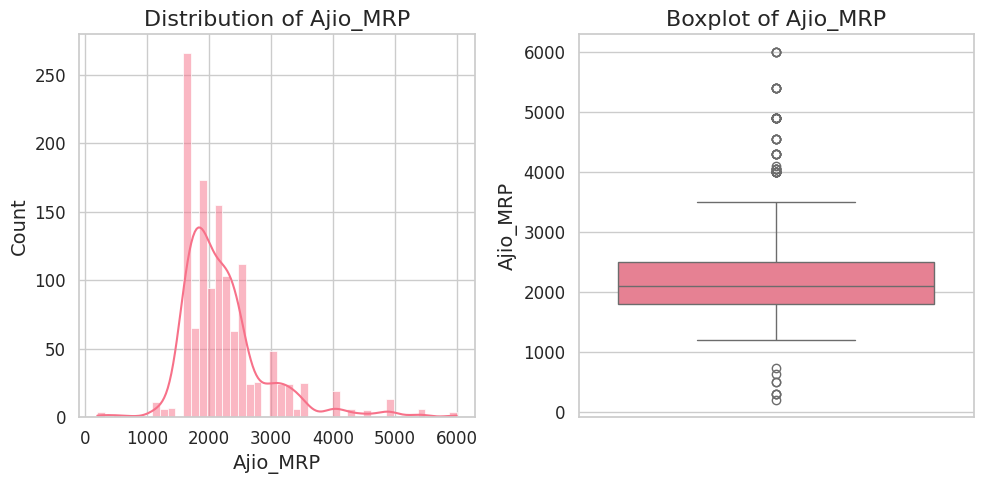

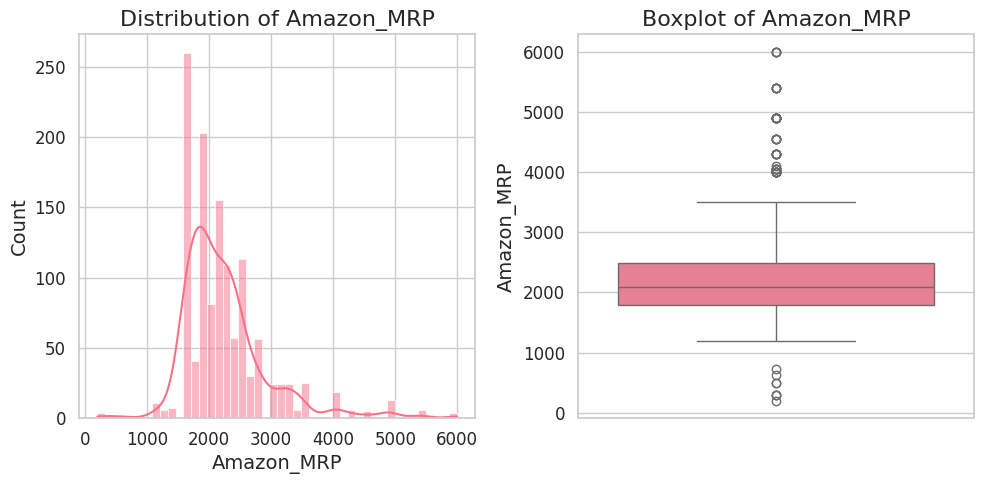

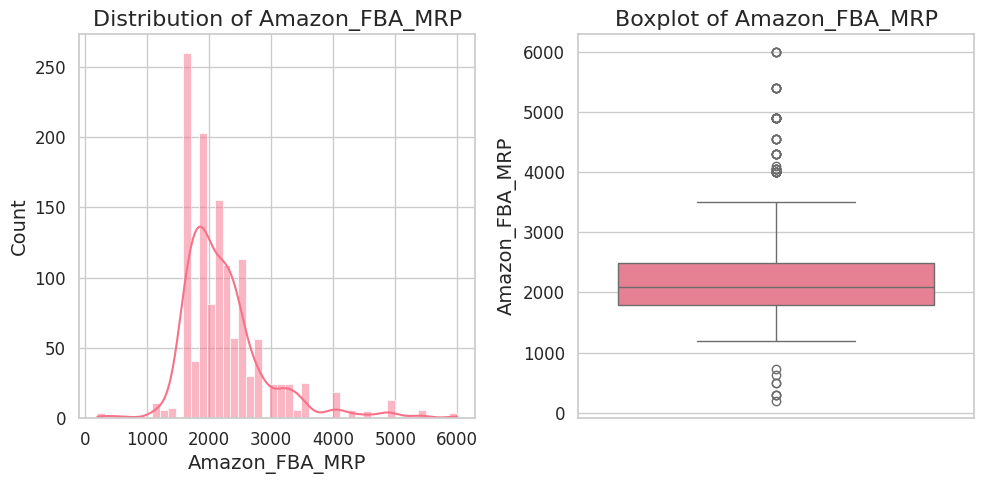

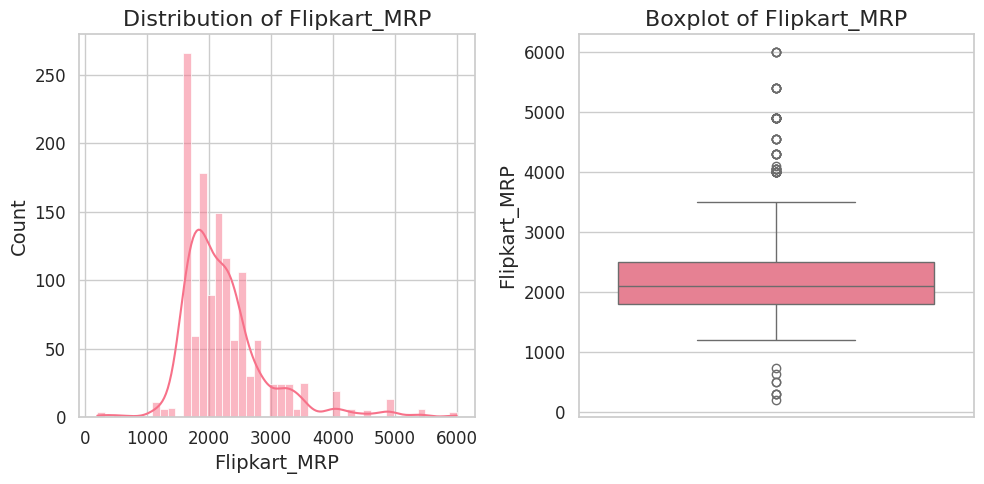

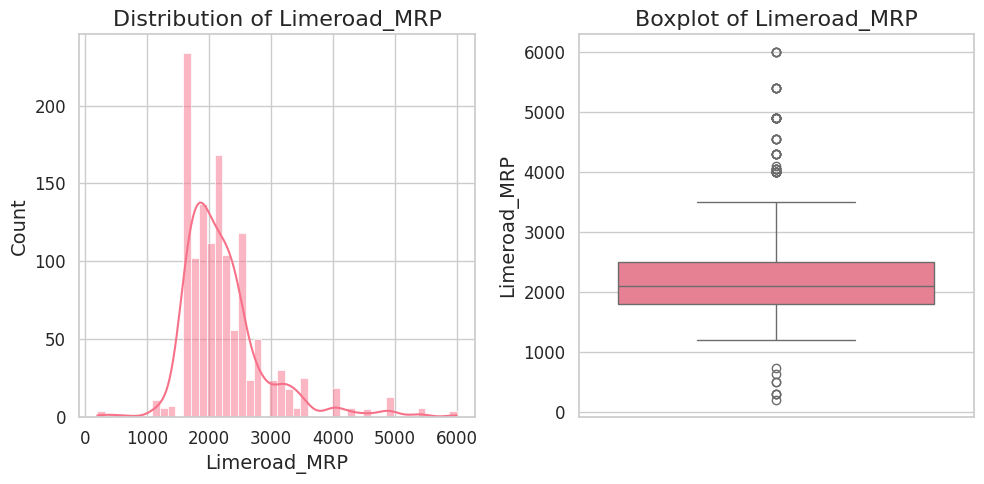

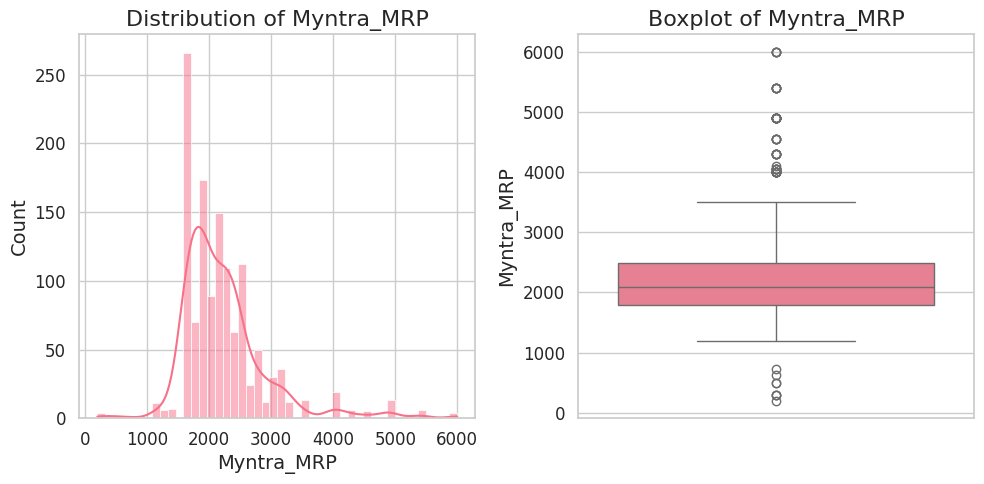

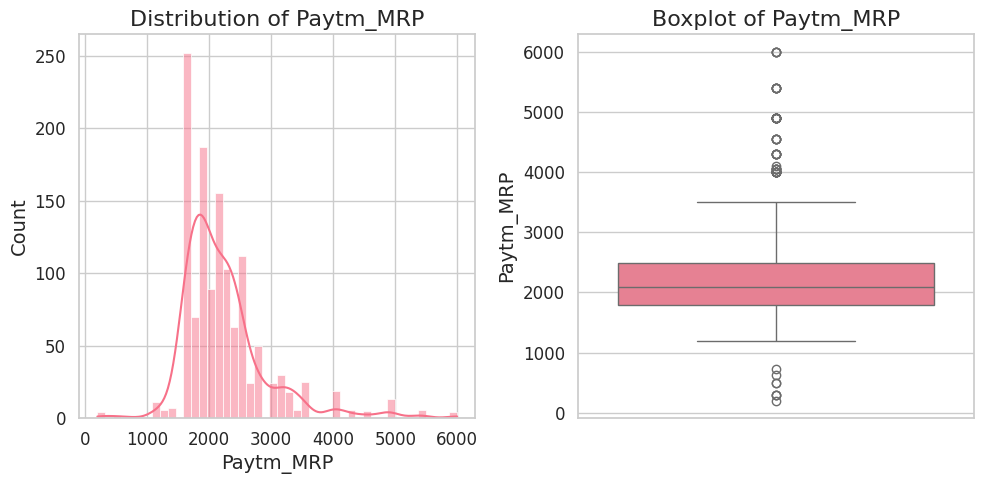

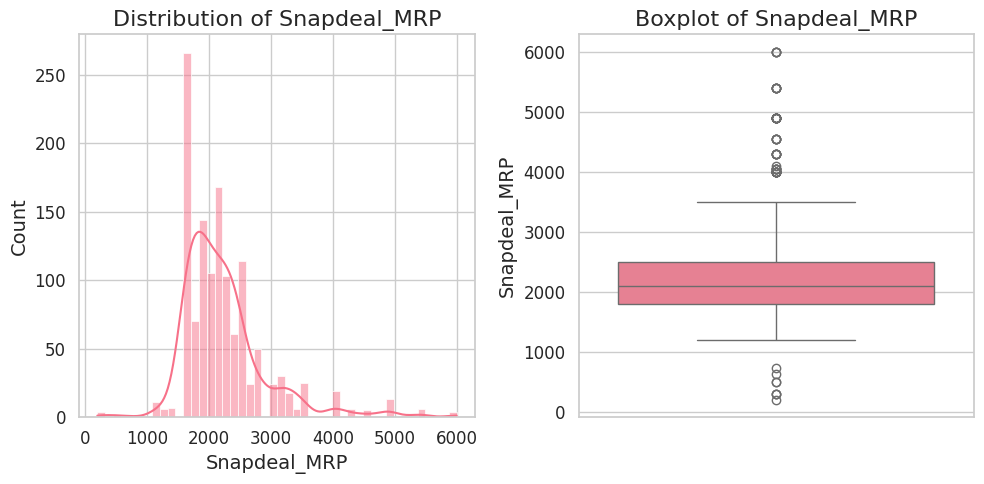

In [74]:
# ========== UNIVARIATE ANALYSIS ==========
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution of {col}')

    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    save_and_show_plot(f"{col}_distribution")

In [75]:
df['Fee'] = df['Final_Old_MRP'] - df['Old_MRP']

df.loc[df['Fee'] < 0, 'Fee'] = 0
df['Fee'].value_counts()

,count
Fee,
0.0,973
117.0,157
157.0,54
57.0,43
97.0,36
137.0,12
257.0,11
177.0,6
185.0,1


In [76]:
# df[:50].to_csv("profit_df.csv", index=False)

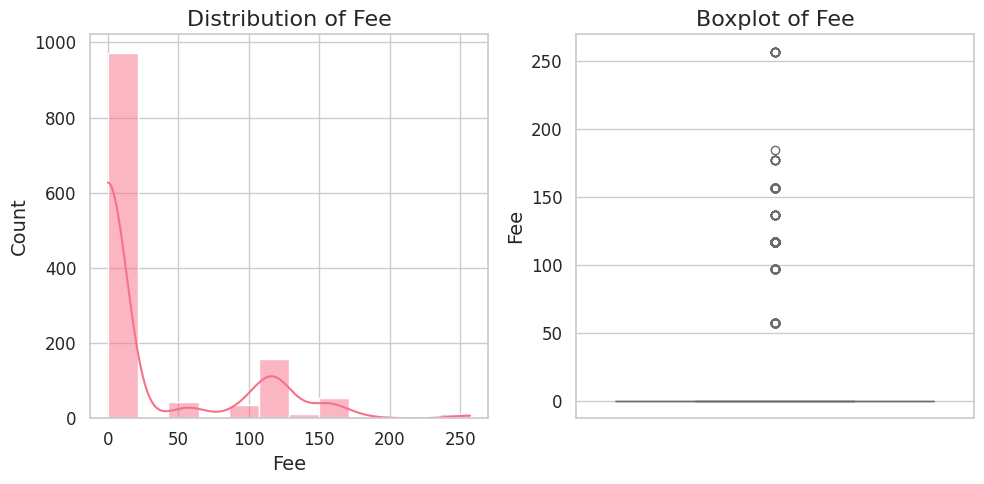

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df['Fee'], ax=axes[0], kde=True)
axes[0].set_title(f'Distribution of Fee')

sns.boxplot(y=df['Fee'], ax=axes[1])
axes[1].set_title(f'Boxplot of Fee')

# stats.probplot(df[col], plot=axes[2])
# axes[2].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
save_and_show_plot("Fee distribution")

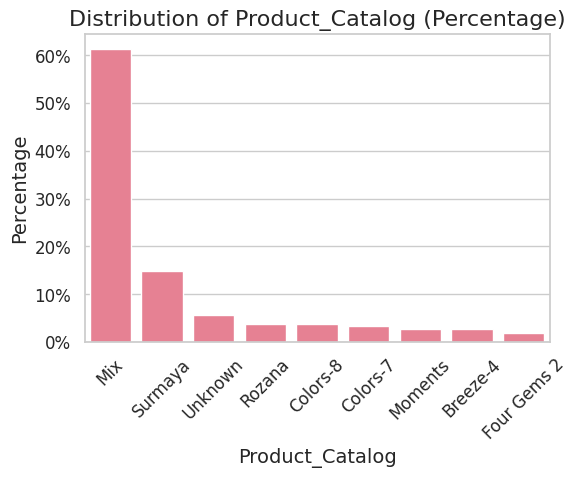

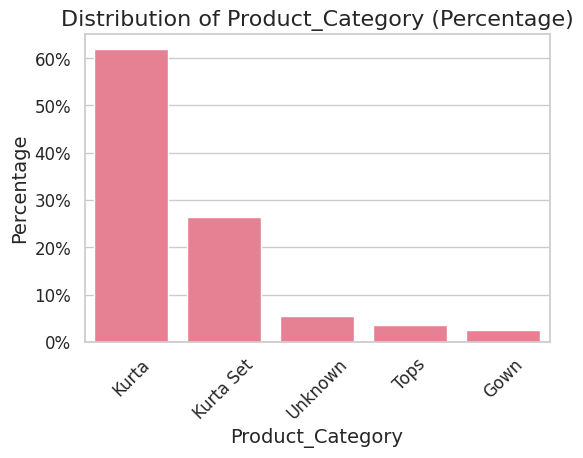

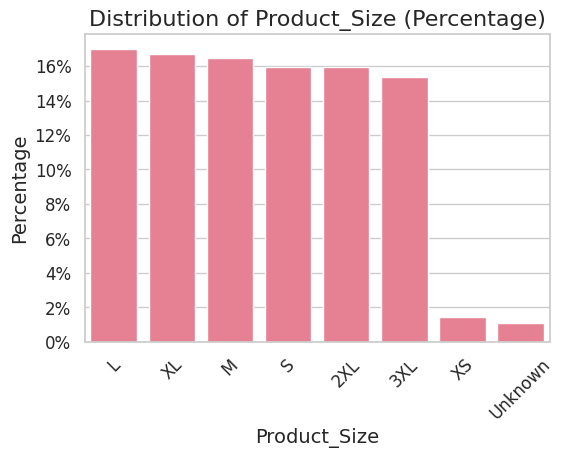

In [78]:
# ========== CATEGORICAL ANALYSIS ==========
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    temp = df[col].value_counts(normalize=True).reset_index(name='Percentage')
    ax = sns.barplot(x=col, y='Percentage', data=temp)

    plt.title(f'Distribution of {col} (Percentage)')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    plt.xticks(rotation=45)

    save_and_show_plot(f"{col}_distribution")

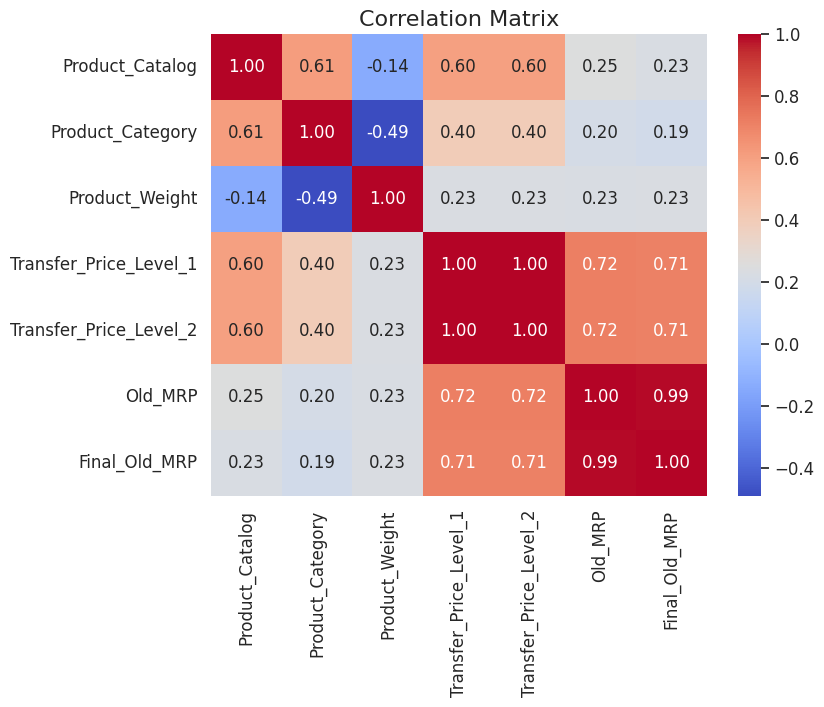

In [79]:
# ========== CORRELATION ANALYSIS ==========
analysis_df = df.copy()
for col in cat_cols:
    analysis_df[col] = analysis_df[col].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.heatmap(analysis_df[[
    'Product_Catalog', 'Product_Category',
    'Product_Weight', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2',
    'Old_MRP', 'Final_Old_MRP']].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
save_and_show_plot("Correlation_Matrix")

In [80]:
marketplace_cols = ['Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP',
                    'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

def calculate_profit_per_marketplace(df, marketplace_cols):
    profit_df = df.copy()
    profit_cols, profit_P_cols = [], []
    for col in marketplace_cols:
        profit_col = f'{col[:-4]}_Profit'
        profit_P_col = f'{col[:-4]}_PP'
        #profit = round(profit_df[col] - profit_df["Final_Old_MRP"], 0)
        profit = round(profit_df[col] - (profit_df["Transfer_Price_Level_1"] + profit_df["Fee"]), 0)
        profit_df[profit_col] = profit
        profit_df[profit_P_col] = round((profit / profit_df[col]) * 100, 0)

        profit_cols.append(profit_col)
        profit_P_cols.append(profit_P_col)
    return profit_df, profit_cols, profit_P_cols

#old_mrp_col = 'Old_MRP'
#old_mrp_col = 'Final_Old_MRP'
profit_df, profit_cols, profit_P_cols = calculate_profit_per_marketplace(df, marketplace_cols)

In [81]:
profit_cols

['Ajio_Profit',
 'Amazon_Profit',
 'Amazon_FBA_Profit',
 'Flipkart_Profit',
 'Limeroad_Profit',
 'Myntra_Profit',
 'Paytm_Profit',
 'Snapdeal_Profit']

In [82]:
# print(profit_per_marketplace['Amazon_MRP_Profit'].mean())

In [83]:
profit_df['Amazon_Profit'].value_counts(dropna=False)

,count
Amazon_Profit,
1300.0,91
1214.0,54
1640.0,48
1500.0,48
1788.0,48
...,...
247.0,1
2343.0,1
3504.0,1


In [84]:
profit_df.head()

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,...,Flipkart_Profit,Flipkart_PP,Limeroad_Profit,Limeroad_PP,Myntra_Profit,Myntra_PP,Paytm_Profit,Paytm_PP,Snapdeal_Profit,Snapdeal_PP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538.0,435.779999,2178.0,2295.0,...,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538.0,435.779999,2178.0,2295.0,...,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538.0,435.779999,2178.0,2295.0,...,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538.0,435.779999,2178.0,2295.0,...,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538.0,435.779999,2178.0,2295.0,...,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0,1640.0,71.0


In [85]:
profit_df[:50].to_csv("profit_df.csv", index=False)

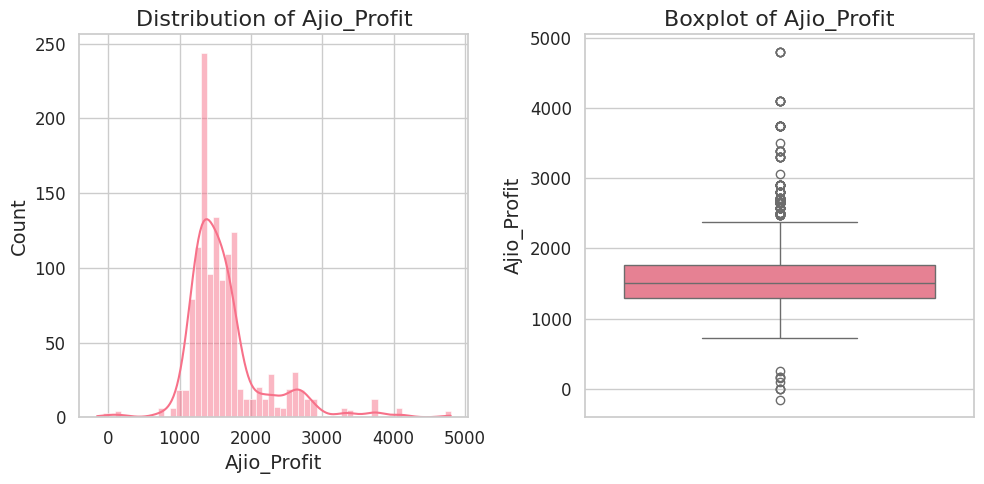

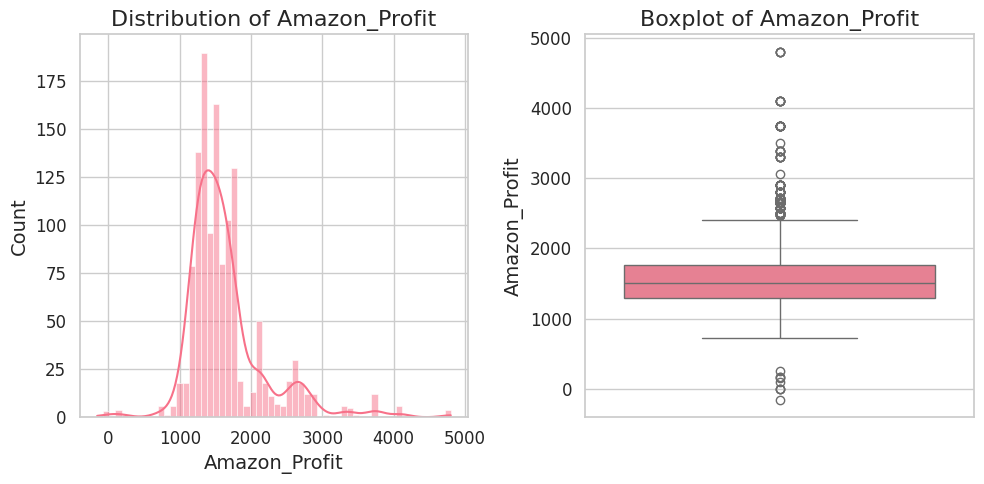

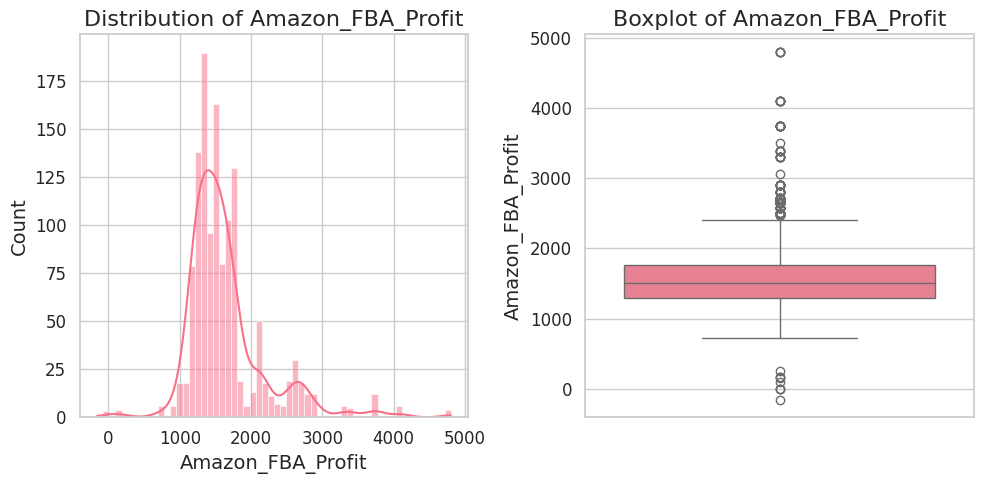

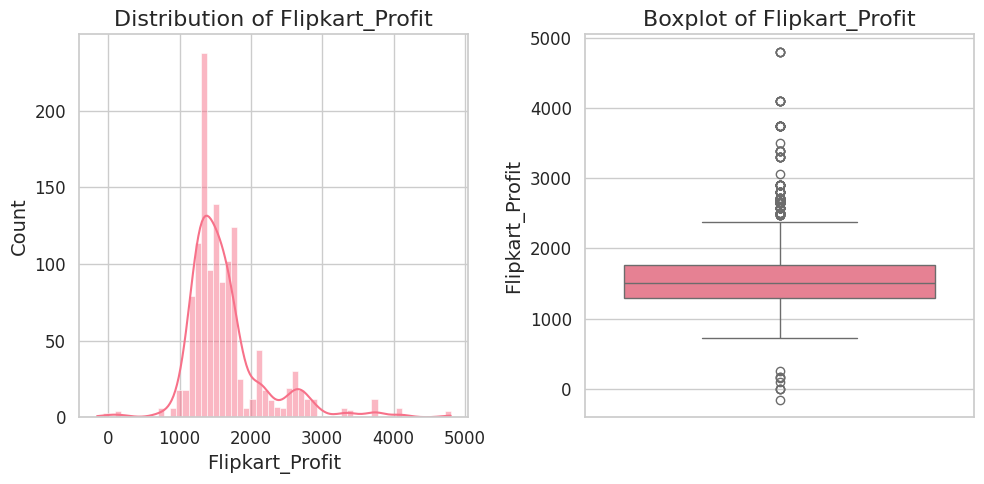

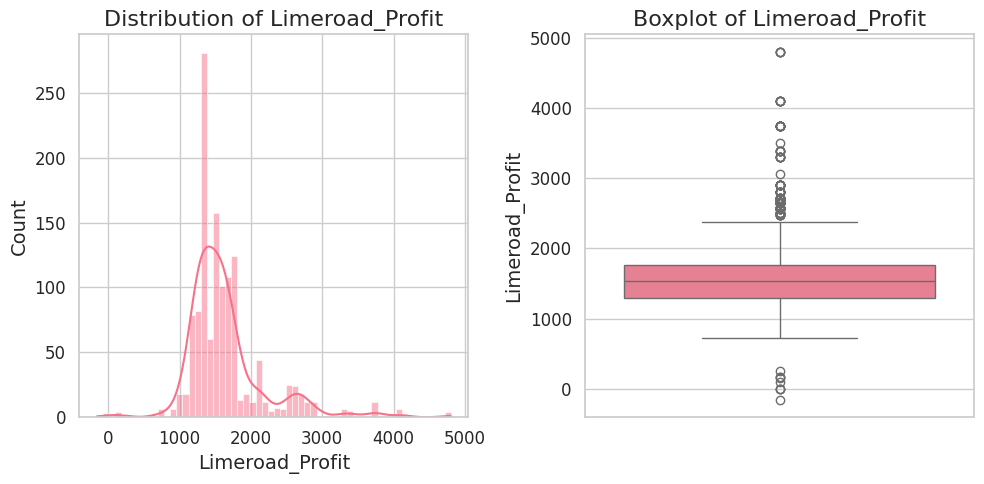

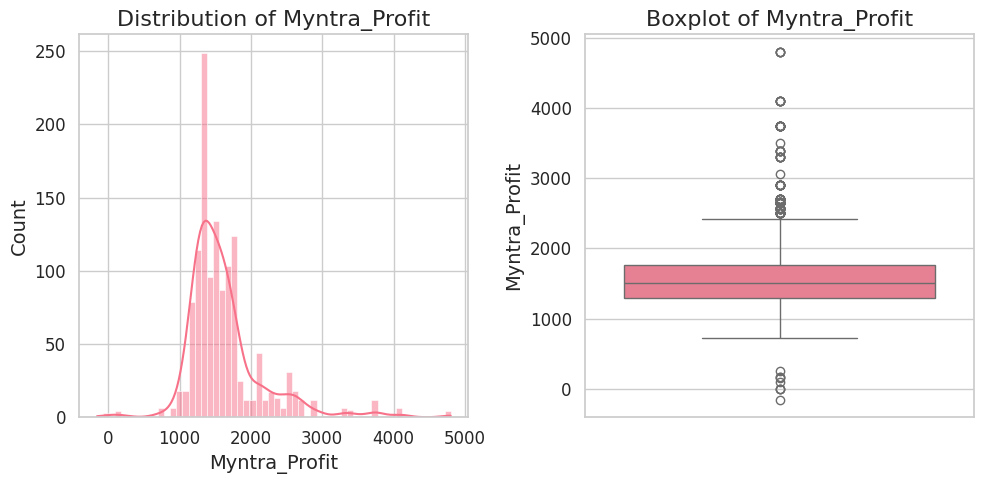

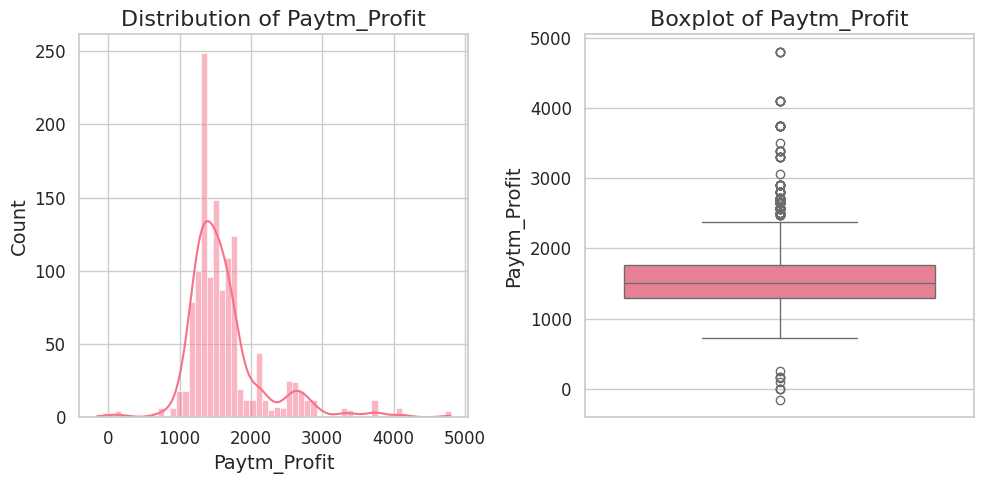

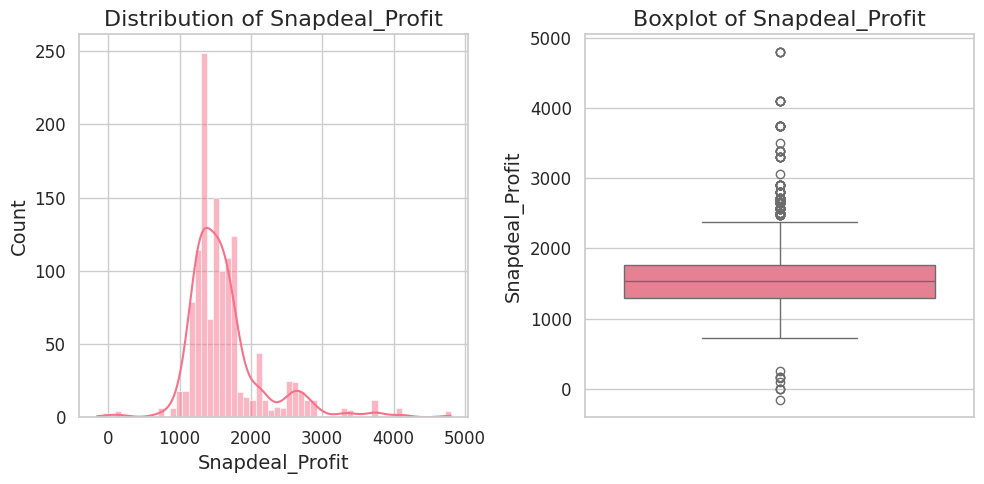

In [86]:
# ========== UNIVARIATE ANALYSIS ==========
for col in profit_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.histplot(profit_df[col], ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution of {col}')

    sns.boxplot(y=profit_df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    save_and_show_plot(f"{col}_distribution")

In [87]:
profit_df[profit_P_cols].mean()

,0
Ajio_PP,72.879349
Amazon_PP,72.952820
Amazon_FBA_PP,72.952820
Flipkart_PP,72.912605
Limeroad_PP,72.911057
Myntra_PP,72.802788
Paytm_PP,72.877029
Snapdeal_PP,72.878578


In [88]:
profit_P_cols

['Ajio_PP',
 'Amazon_PP',
 'Amazon_FBA_PP',
 'Flipkart_PP',
 'Limeroad_PP',
 'Myntra_PP',
 'Paytm_PP',
 'Snapdeal_PP']

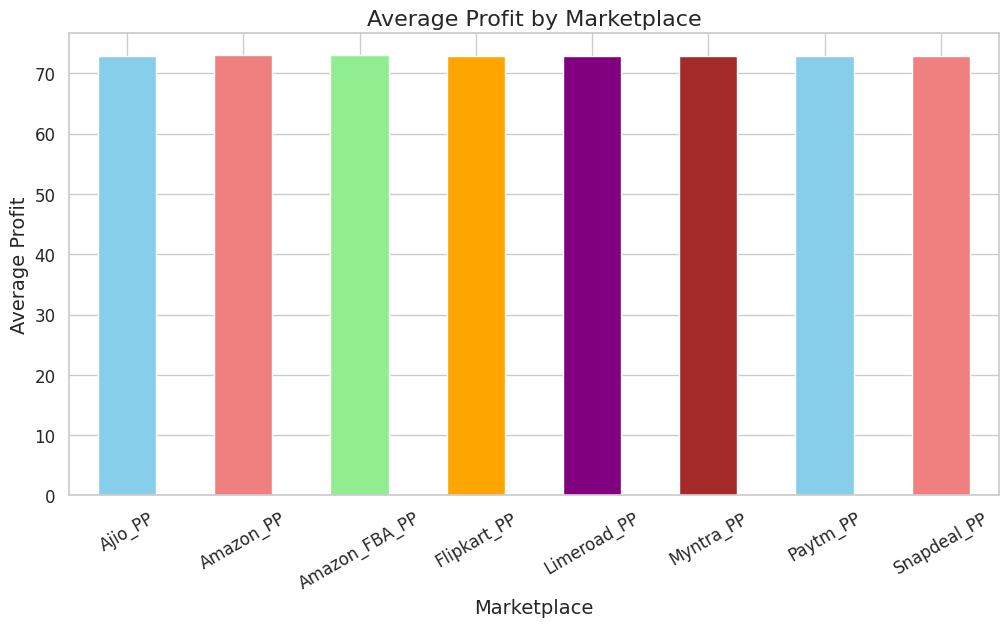

In [89]:
plt.figure(figsize=(12, 6))

profit_P_cols = ['Ajio_PP', 'Amazon_PP', 'Amazon_FBA_PP', 'Flipkart_PP', 'Limeroad_PP', 'Myntra_PP', 'Paytm_PP', 'Snapdeal_PP']
profit_df[profit_P_cols].mean().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple', 'brown'])
plt.title('Average Profit by Marketplace')
plt.xlabel('Marketplace')
plt.xticks(rotation=30)
plt.ylabel('Average Profit')
save_and_show_plot("Average_Profit_by_Marketplace")

In [90]:
profit_df.groupby('Product_Category')[profit_cols].mean()

,Ajio_Profit,Amazon_Profit,Amazon_FBA_Profit,Flipkart_Profit,Limeroad_Profit,Myntra_Profit,Paytm_Profit,Snapdeal_Profit
Product_Category,,,,,,,,
Gown,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
Kurta,1492.228149,1507.938843,1507.938843,1501.829224,1502.951416,1493.724487,1495.719482,1497.714478
Kurta Set,1938.087769,1924.438599,1924.438599,1924.052612,1922.333374,1892.789429,1922.333374,1922.333374
Tops,1361.666626,1361.666626,1361.666626,1350.555542,1339.444458,1339.666626,1339.444458,1339.444458
Unknown,1682.222168,1689.236084,1689.236084,1682.222168,1682.222168,1682.222168,1682.222168,1682.222168


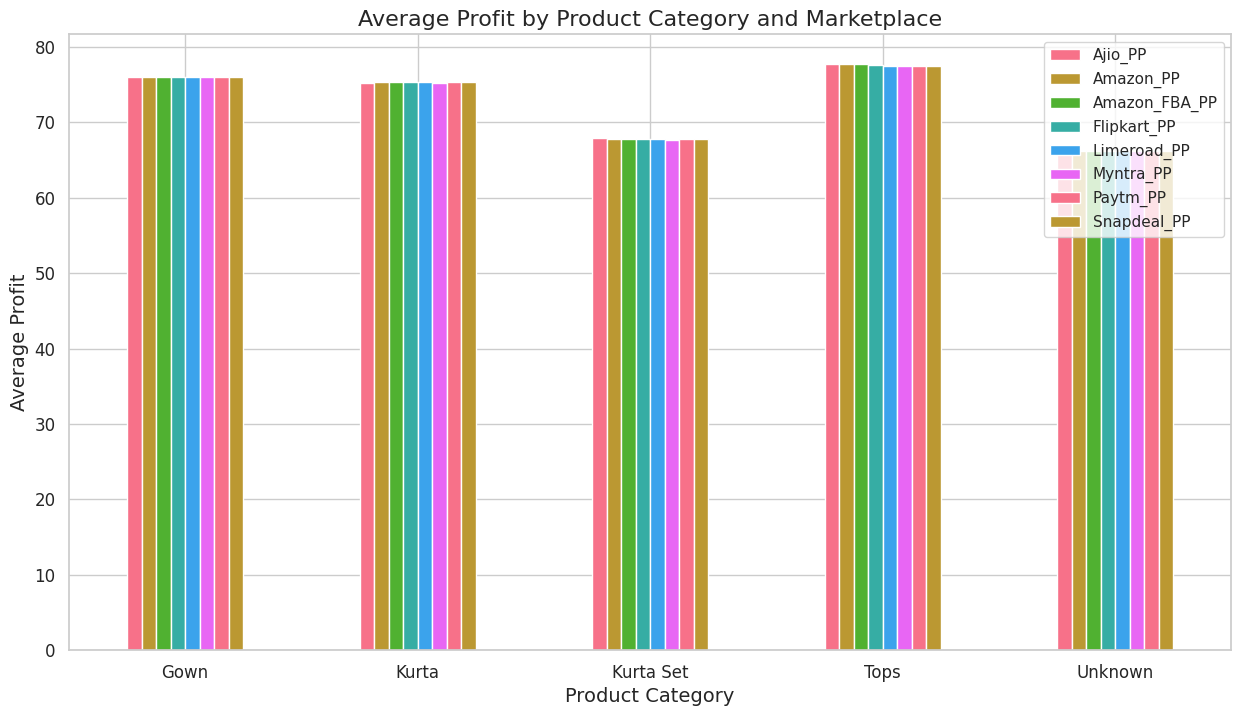

In [91]:
average_profit_by_category = profit_df.groupby('Product_Category')[profit_P_cols].mean()

average_profit_by_category.plot(kind='bar', figsize=(15, 8))
plt.title('Average Profit by Product Category and Marketplace')
plt.xlabel('Product Category')
plt.ylabel('Average Profit')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='best')
save_and_show_plot("Average_Profit_by_Category_Marketplace")

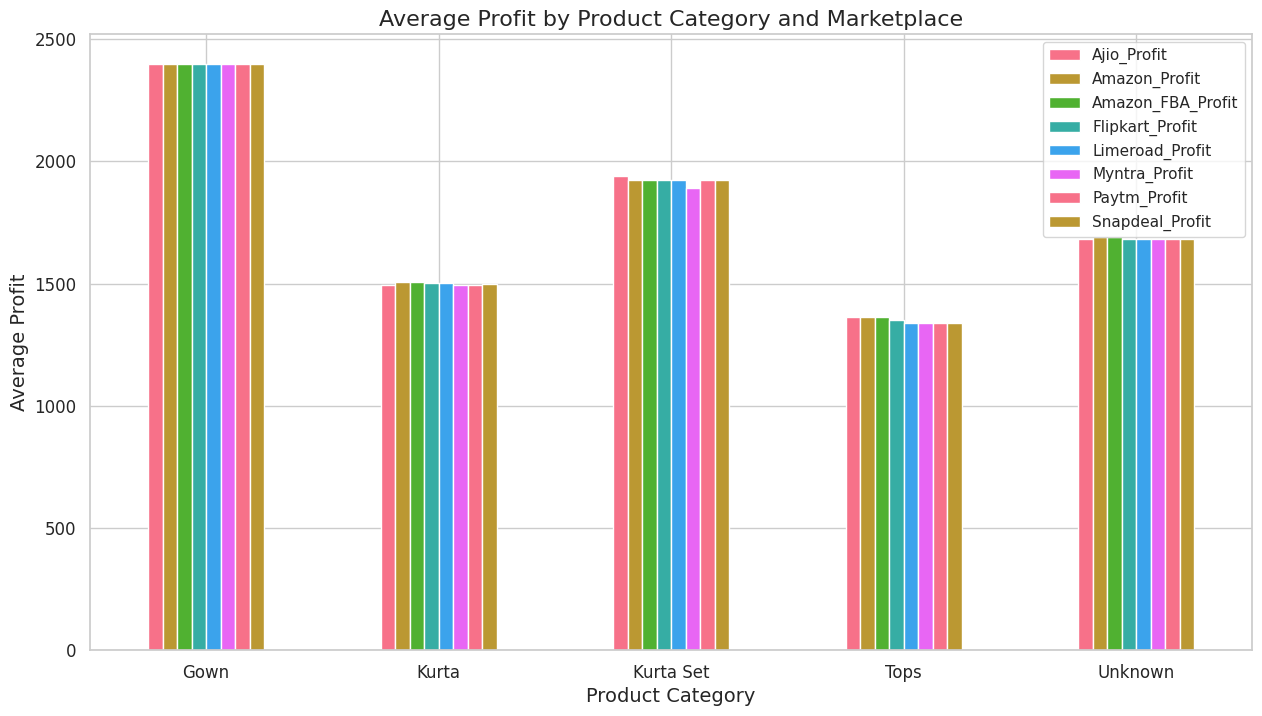

In [92]:
average_profit_by_category = profit_df.groupby('Product_Category')[profit_cols].mean()

average_profit_by_category.plot(kind='bar', figsize=(15, 8))
plt.title('Average Profit by Product Category and Marketplace')
plt.xlabel('Product Category')
plt.ylabel('Average Profit')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='best')
save_and_show_plot("Average_Profit_by_Category_Marketplace")

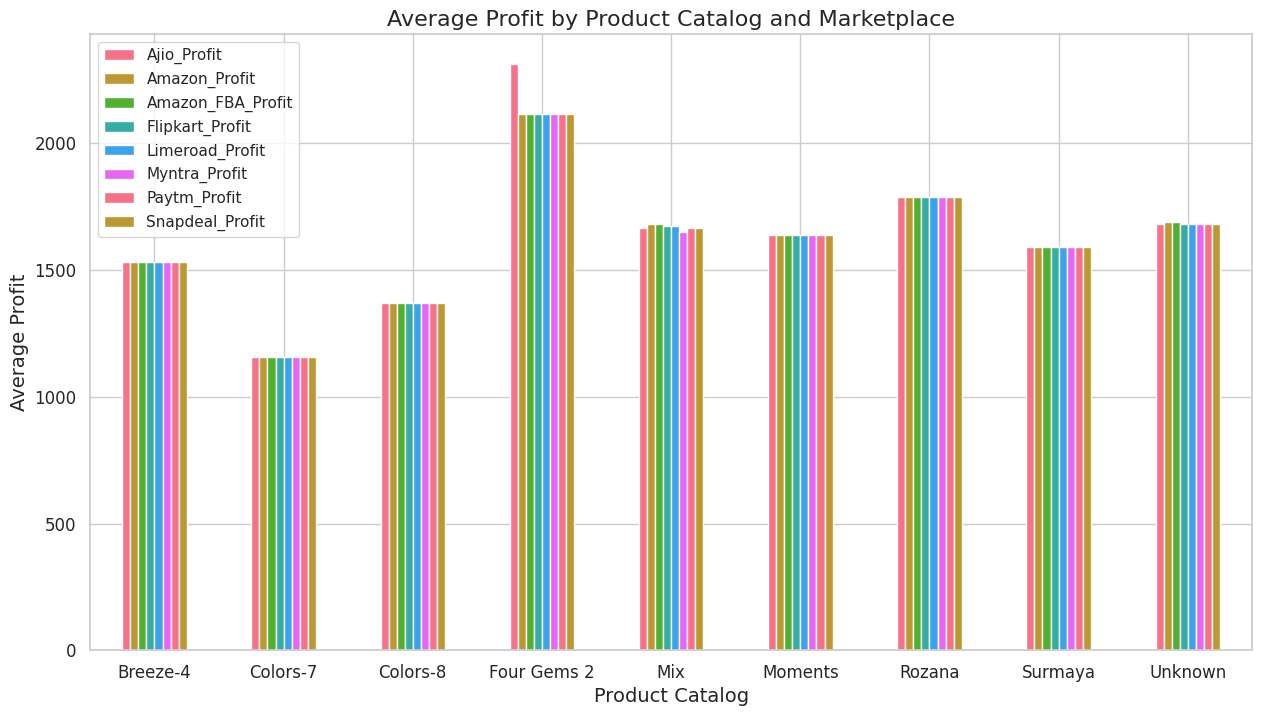

In [93]:
average_profit_by_catalog = profit_df.groupby('Product_Catalog')[profit_cols].mean()

average_profit_by_catalog.plot(kind='bar', figsize=(15, 8))
plt.title('Average Profit by Product Catalog and Marketplace')
plt.xlabel('Product Catalog')
plt.ylabel('Average Profit')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='best')
save_and_show_plot("Average_Profit_by_Catalog_Marketplace")

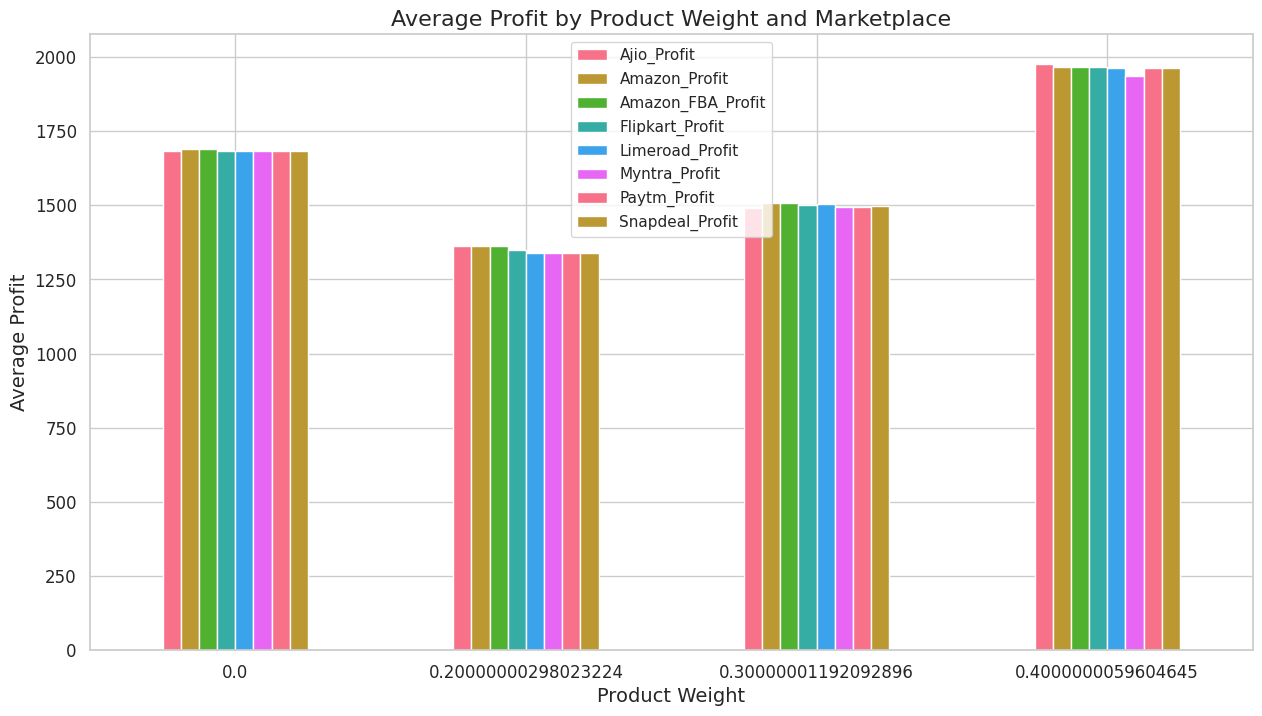

In [94]:
average_profit_by_weight = profit_df.groupby('Product_Weight')[profit_cols].mean()

average_profit_by_weight.plot(kind='bar', figsize=(15, 8))
plt.title('Average Profit by Product Weight and Marketplace')
plt.xlabel('Product Weight')
plt.ylabel('Average Profit')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='best')
save_and_show_plot("Average_Profit_by_Weight_Marketplace")

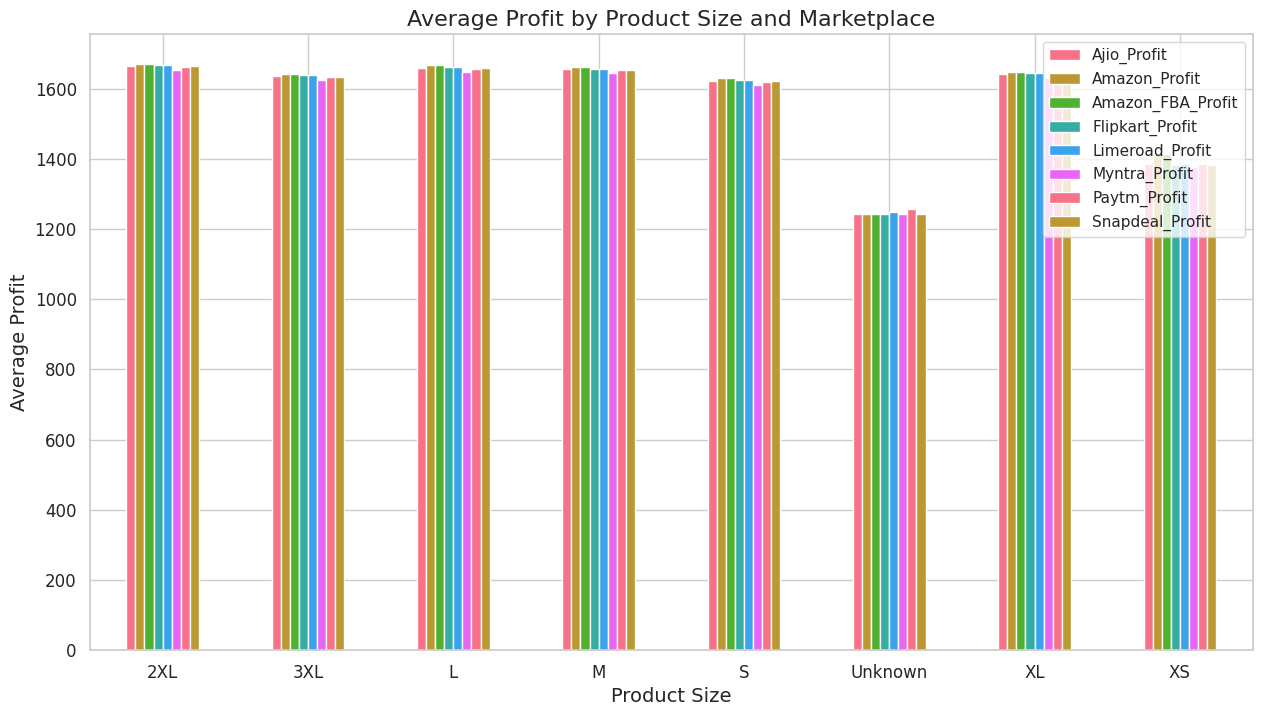

In [95]:
average_profit_by_size = profit_df.groupby('Product_Size')[profit_cols].mean()

average_profit_by_size.plot(kind='bar', figsize=(15, 8))
plt.title('Average Profit by Product Size and Marketplace')
plt.xlabel('Product Size')
plt.ylabel('Average Profit')
plt.xticks(rotation=0, ha='center')
plt.legend(loc='best')
save_and_show_plot("Average_Profit_by_Size_Marketplace")

In [96]:
df["Transfer_Price_Level_1"].value_counts()

,count
Transfer_Price_Level_1,
395.000000,139
425.000000,117
381.000000,97
538.000000,48
590.000000,48
...,...
806.000000,1
630.500000,1
498.000000,1


In [97]:
def calculate_highest_avg_mrp_ratio(df):
    # Calculate the MRP to cost ratio
    df['MRP_to_Cost_Ratio'] = df['Final_Old_MRP'] / (df['Transfer_Price_Level_1'] + df['Fee'])

    # Group by category and calculate the average ratio
    avg_ratio_by_category = df.groupby('Product_Category')['MRP_to_Cost_Ratio'].mean()

    # Find the category with the highest average ratio
    highest_ratio_category = avg_ratio_by_category.idxmax()
    return highest_ratio_category, avg_ratio_by_category

calculate_highest_avg_mrp_ratio(profit_df)

('Tops',
 Product_Category
 Gown         4.184809
 Kurta        4.113603
 Kurta Set    3.424879
 Tops         4.475312
 Unknown      3.379734
 Name: MRP_to_Cost_Ratio, dtype: float32)

# Zip

In [98]:
# Specify the folder to zip and the output zip file name
folder_to_zip = "/content/plots"
output_zip_file = "plots"

# Call the function to zip the folder
zip_folder(folder_to_zip, output_zip_file)

Folder '/content/plots' successfully zipped to 'plots.zip'
